# L3264 P=[000]

## Read data into corrMatrix [Always Run]

First we read the data, making sure the correlation matrix is hermitian in the process.  It seems that one configuration has an issue and is only hermitian to a precision of 1e-4, so we remove it for now.  I can remove one more so that there are 296 configurations, which is divisible by 2,4,8 for binning purposes.

In [3]:
%load_ext autoreload
%autoreload 2

from utils import *
from jk import *
from pivot_method import *
from stats import *
from fitting import *
from plotting import *

import gvar 
import lsqfit
import matplotlib.pyplot as plt 

import multiprocess as MP
import os

dataDir=os.path.join(os.path.expanduser('~'), "Documents",
                    "LatticeQCD", "A1", "L3264")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
mpi=0.1378

NOPS=13
NT=24
NCFG=parse_corr_file(dataDir,0,0,NT).shape[0]

corrMatrix=np.array([[parse_corr_file(dataDir,i,j,NT) for i in range(NOPS)] for j in range(NOPS)])
corrMatrix=np.moveaxis(corrMatrix,[0,1,2,3],[2,3,0,1])
#corrMatrixr=normalize_corr_matix(corrMatrix, 1)

print(corrMatrix.shape)


(400, 24, 13, 13)


$$
    C^N(t)_{ij}=\frac{C(t)_{ij}}{\sqrt{C(t0)_{ii}C(t0)_{jj}}}
$$

In [5]:
is_hermitian(corrMatrix,1e-8)

         Checking ensemble average, c[t,i,j]


False

In [6]:
non_hermitian_configs(corrMatrix)

cfg #4 for ts=[6] non-hermitian to 1e-8
cfg #125 for ts=[21] non-hermitian to 1e-8


In [7]:
non_hermitian_tolerance(corrMatrix[319,10])

Reached tolerance at 1.00e-08


In [8]:
#corrMatrix=np.delete(corrMatrix,144,axis=0)
#corrMatrix=np.delete(corrMatrix,297,axis=0) 
#is_hermitian(corrMatrix)

In [9]:
corrMatrix.shape

(400, 24, 13, 13)

## Raw effective masses

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


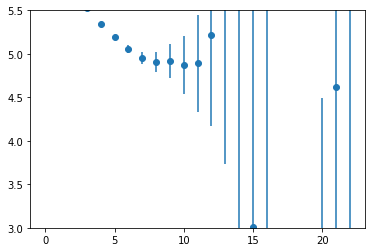

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


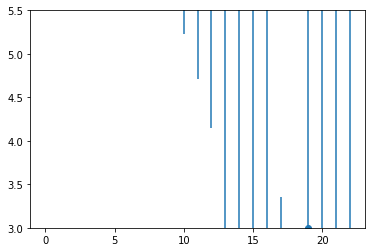

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


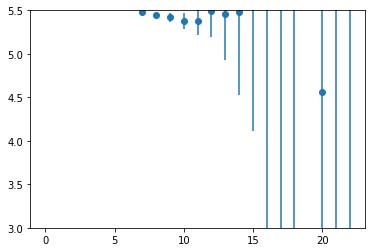

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))


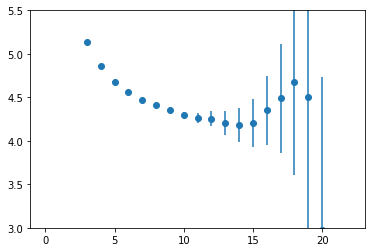

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


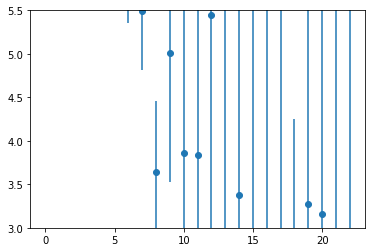

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


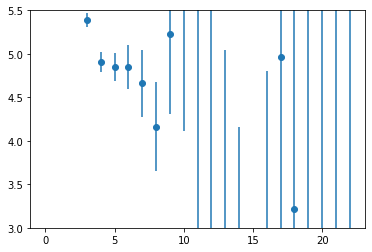

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))


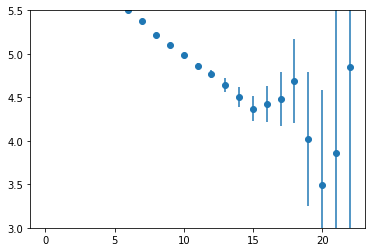

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


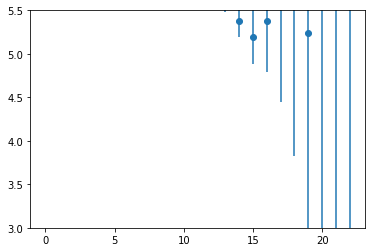

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


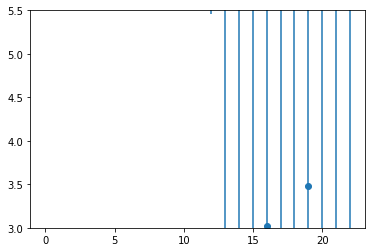

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


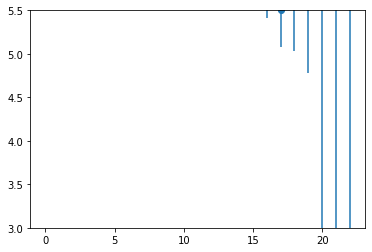

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


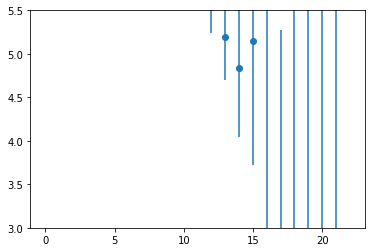

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))
/home/chris/Code/LQCD/a1_analysis/utils.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(-1j*math.pi + math.log(-avg[t]/avg[t+1]))


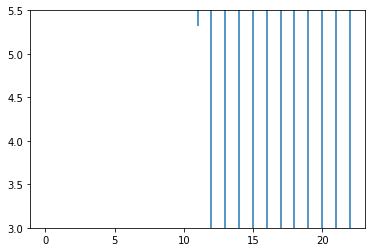

/home/chris/Code/LQCD/a1_analysis/utils.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  res.append(math.log(avg[t]/avg[t+1]))


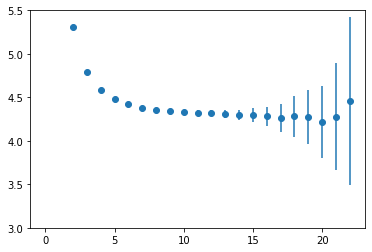

In [34]:
for i in range(NOPS):
    c00=corrMatrix[:,:,i,i]
    effMass=jackKnife(log_effective_mass, c00.real)
    plt.errorbar([t for t in range(len(effMass[0]))], effMass[0].real/mpi, yerr=effMass[1].real/mpi,
        linestyle="None", marker="o")
    plt.ylim(3,5.5)
    plt.show()

## Removing one op at a time

In [10]:
fitTypes={}
fitTypes['single']={'fcn': single_exp, 'p0': p0_single()}
# fitTypes['double']={'fcn': double_exp, 'p0': p0_double()}
fitTypes['triple']={'fcn': triple_exp, 'p0': p0_triple()}

allOps = [o for o in range(NOPS)]
opBasis = [[o for o in range(NOPS)] for i in range(NOPS)]
for i,lst in enumerate(opBasis[0:2]):
    lst.pop(i)
opBasis.append(allOps)

subCorrMatrix = lambda ops : corrMatrix.take(ops, axis=3).take(ops, axis=2)

def get_allEnergies(t0,td):
    allEnergies={'mavg': {}, 'best': {}}
    fitEns=5
    for idx,ops in enumerate(opBasis):
        pivotedCorr=get_pivoted_corr(subCorrMatrix(ops),t0,td)

        getModelAvg = lambda en : perform_model_avg(pivotedCorr, en, fitTypes, t0, NT, mpi)
        getBestFit = lambda en: perform_best_fit(pivotedCorr, en, fitTypes, t0, NT, mpi)

        mpPool = MP.Pool(6)    
        mAvgs = list(mpPool.map(getModelAvg, range(fitEns)))
        bestFits = list(mpPool.map(getBestFit, range(fitEns)))

        allEnergies['mavg'][idx]=mAvgs
        allEnergies['best'][idx]=bestFits

        print("done with op set {}".format(idx))
        pivotedCorr=None
    return allEnergies

In [36]:
### t0=3, td=5

t0=3
td=5
corrMatrix=corrMatrix.astype(np.complex64)
allEnergies=get_allEnergies(t0=t0,td=td)

/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.9/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: divide by zero encountered in true_divide
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np

done with op set 0


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:2

done with op set 1


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mea

done with op set 2


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mea

done with op set 3


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mea

KeyboardInterrupt: 

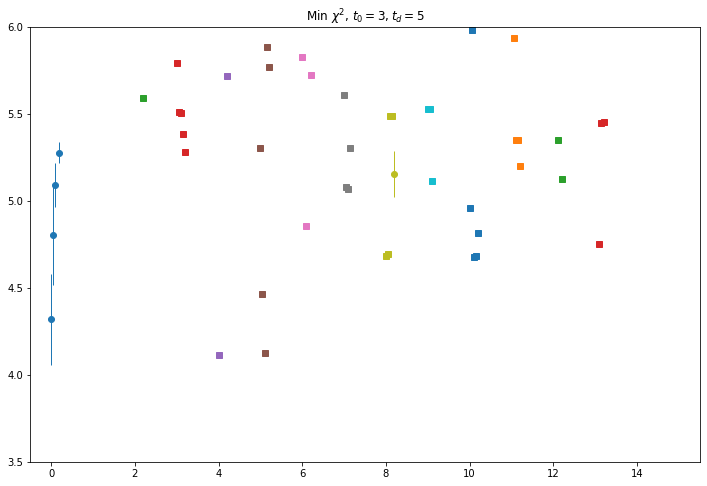

In [37]:
plt.figure(figsize=(12,8))
plot_fit_results(allEnergies,'best',mpi)
plt.xlim(-0.5,15.5)
plt.ylim(3.5,6)
# plot ni levels after to get correct ylim
#plot_ni_levels(niData)
plt.title('Min $\chi^2$, $t_0={}, t_d={}$'.format(t0,td))
plt.show()

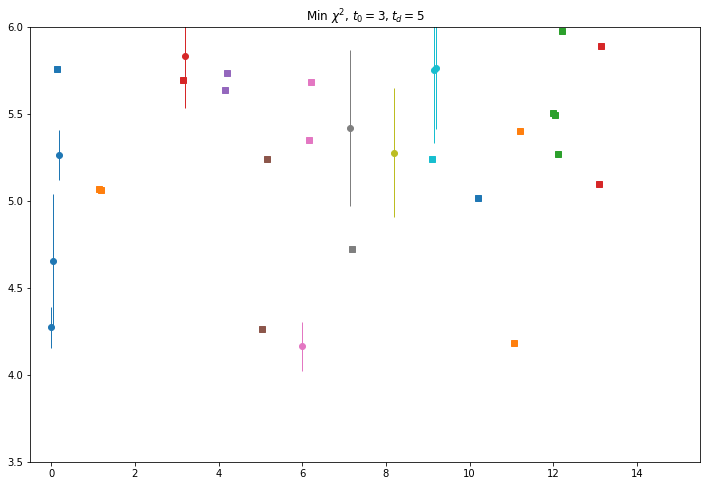

In [38]:
plt.figure(figsize=(12,8))
plot_fit_results(allEnergies,'mavg',mpi)
plt.xlim(-0.5,15.5)
plt.ylim(3.5,6)
# plot ni levels after to get correct ylim
#plot_ni_levels(niData)
plt.title('Min $\chi^2$, $t_0={}, t_d={}$'.format(t0,td))
plt.show()

In [11]:
### t0=3, td=5

t0=5
td=7
corrMatrix=corrMatrix.astype(np.complex64)
allEnergies=get_allEnergies(t0=t0,td=td)

/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)

done with op set 0


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/

done with op set 1


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, 

done with op set 2


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, 

done with op set 3


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, 

done with op set 4


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, 

done with op set 5


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, 

done with op set 6


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*n

done with op set 7


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, 

done with op set 8


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, 

done with op set 9


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*n

done with op set 10


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*n

done with op set 11


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*n

done with op set 12


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, 

done with op set 13


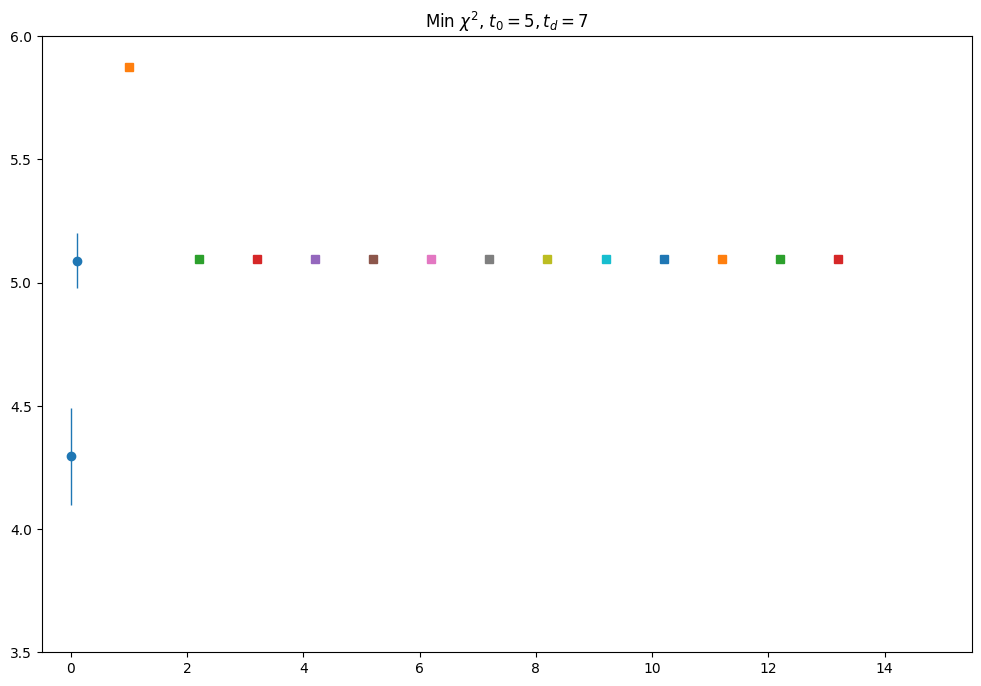

In [12]:
plt.figure(figsize=(12,8))
plot_fit_results(allEnergies,'best',mpi)
plt.xlim(-0.5,15.5)
plt.ylim(3.5,6)
# plot ni levels after to get correct ylim
#plot_ni_levels(niData)
plt.title('Min $\chi^2$, $t_0={}, t_d={}$'.format(t0,td))
plt.show()

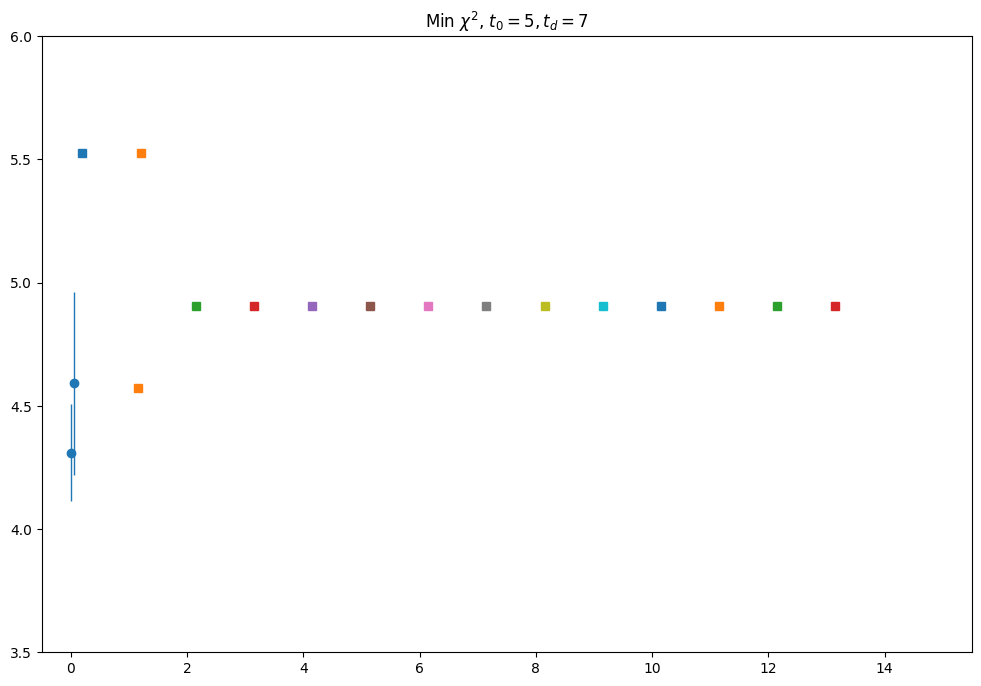

In [13]:
plt.figure(figsize=(12,8))
plot_fit_results(allEnergies,'mavg',mpi)
plt.xlim(-0.5,15.5)
plt.ylim(3.5,6)
# plot ni levels after to get correct ylim
#plot_ni_levels(niData)
plt.title('Min $\chi^2$, $t_0={}, t_d={}$'.format(t0,td))
plt.show()

## All ops t0,td

In [14]:
fitTypes={}
fitTypes['single']={'fcn': single_exp, 'p0': p0_single()}
# fitTypes['double']={'fcn': double_exp, 'p0': p0_double()}
fitTypes['triple']={'fcn': triple_exp, 'p0': p0_triple()}

#niData=niFile_to_dict("L4848_a2g.hdf5","A2g")

allEnergies={'mavg': {}, 'best': {}}
fitEns=5
for t0 in range(2,10):
    for td in range(t0+1, 2*t0+1):
        if td<NT-2:
            pivotedCorr=get_pivoted_corr(corrMatrix,t0,td)

            getModelAvg = lambda en : perform_model_avg(pivotedCorr, en, fitTypes, t0, NT, mpi)
            getBestFit = lambda en: perform_best_fit(pivotedCorr, en, fitTypes, t0, NT, mpi)

            mpPool = MP.Pool(6)    
            mAvgs = list(mpPool.map(getModelAvg, range(fitEns)))
            bestFits = list(mpPool.map(getBestFit, range(fitEns)))

            #getFits = lambda en : perform_many_fits(pivotedCorr, en, fitTypes, t0, NT, mpi)
            #mpPool = MP.Pool(6)    
            #allFitData = list(mpPool.map(getFits, range(fitEns)))
            
            #mAvgs=[]
            #bestFits=[]
            #for en in range(fitEns):
            #    allFits, model_probs, energies = allFitData[en]
            
            #    allFits, model_probs, energies = remove_bad_fits(allFits, model_probs, energies, mpi)
            #    mAvgs.append(model_avg(energies, model_probs))
            #    bestFits.append(min_chi2_fit(energies, allFits))


            tLabel = "{},{}".format(t0,td)
            allEnergies['mavg'][tLabel]=mAvgs
            allEnergies['best'][tLabel]=bestFits

            print("Done fitting for t0={}, td={}".format(t0,td))

/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting

Done fitting for t0=2, td=3


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["

Done fitting for t0=2, td=4


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)

Done fitting for t0=3, td=4


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid

Done fitting for t0=3, td=5


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0

Done fitting for t0=3, td=6


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: in

Done fitting for t0=4, td=5


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = act

Done fitting for t0=4, td=6


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_anal

Done fitting for t0=4, td=7


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:2

Done fitting for t0=4, td=8


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp

Done fitting for t0=5, td=6


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*n

Done fitting for t0=5, td=7


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:2

Done fitting for t0=5, td=8


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/

Done fitting for t0=5, td=9


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/

Done fitting for t0=5, td=10


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/hom

Done fitting for t0=6, td=7


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-

Done fitting for t0=6, td=8


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*

Done fitting for t0=6, td=9


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: divide by zero encountered in divide
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/

Done fitting for t0=6, td=10


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_anal

Done fitting for t0=6, td=11


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid v

Done fitting for t0=6, td=12


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["

Done fitting for t0=7, td=8


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(

Done fitting for t0=7, td=9


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, 

Done fitting for t0=7, td=10


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  

Done fitting for t0=7, td=11


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96:

Done fitting for t0=7, td=12


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: divide by zero encountered in divide
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt

Done fitting for t0=7, td=13


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1

Done fitting for t0=7, td=14


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow e

Done fitting for t0=8, td=9


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarni

Done fitting for t0=8, td=10


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gva

Done fitting for t0=8, td=11


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/st

Done fitting for t0=8, td=12


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]

Done fitting for t0=8, td=13


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg

Done fitting for t0=8, td=14


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid valu

Done fitting for t0=8, td=15


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/hom

Done fitting for t0=8, td=16


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["

Done fitting for t0=9, td=10


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]

Done fitting for t0=9, td=11


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp

Done fitting for t0=9, td=12


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  re

Done fitting for t0=9, td=13


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)

Done fitting for t0=9, td=14


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/

Done fitting for t0=9, td=15


/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow e

Done fitting for t0=9, td=16


/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/

Done fitting for t0=9, td=17


/home/chris/anaconda3/envs/LQCD/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: i

Done fitting for t0=9, td=18


In [15]:
t0=4
td=5
pivotedCorr=get_pivoted_corr(corrMatrix,t0,td)
allFitInfos={}

(2.0, 5.0)

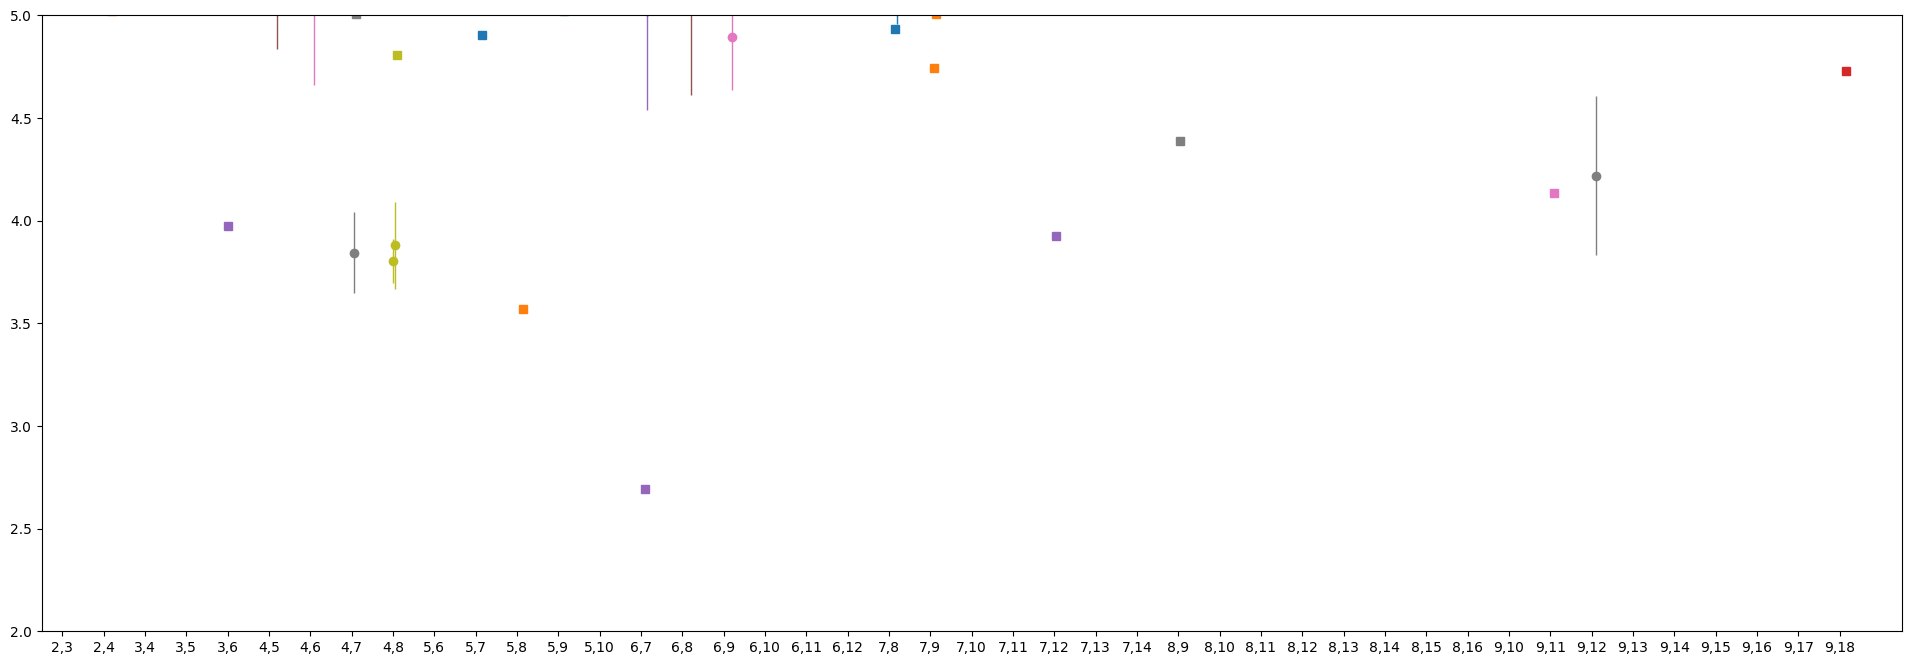

In [18]:
#niData=niFile_to_dict("L4848_a2g.hdf5","A2g")
plt.figure(figsize=(24,8))
plot_t0td_fit_results(allEnergies, 'mavg', mpi)
plt.xlim(-0.5,len(allEnergies['mavg'])+0.5)
plt.ylim(2.0,5)
#plot_ni_levels(niData)

/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/stats.py:96: RuntimeWarning: invalid value encountered in sqrt
  return gv.gvar(mean_avg, np.sqrt(var_avg))
/home/chris/Code/LQCD/a1_analysis/plotting.py:13: RuntimeWarning: invalid value encountered in log
  effMass = lambda en: np.array([gvar.log(corrErr(en)[t]/corrErr(en)[t+1]) for t in range(NT-1)])/mpi


6.08141 +- nan


ValueError: 'yerr' must not contain negative values

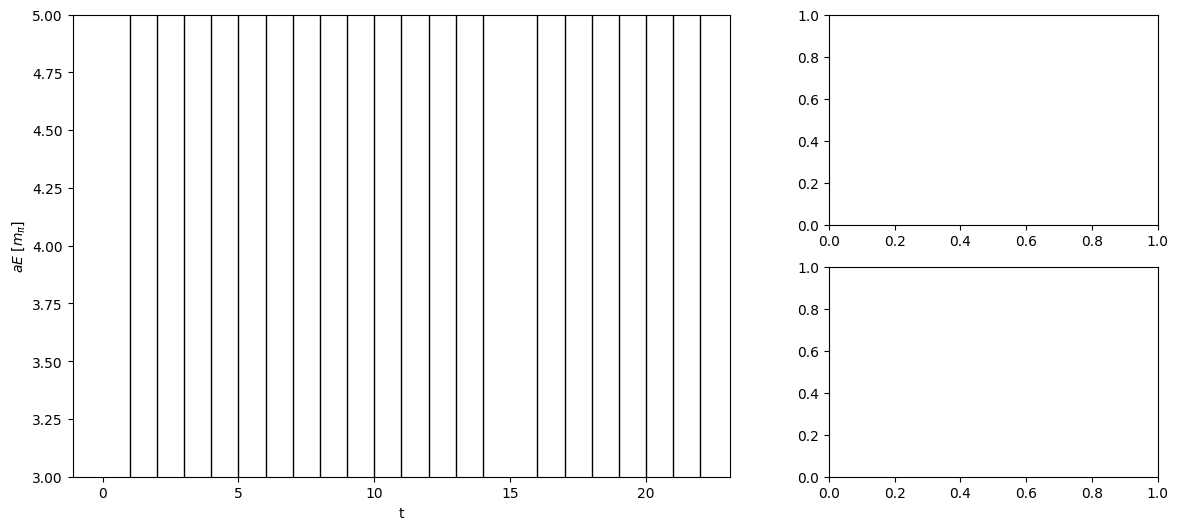

In [17]:
en=0
fitTypes={}
fitTypes['single']={'fcn': single_exp, 'p0': p0_single()}
fitTypes['triple']={'fcn': triple_exp, 'p0': p0_triple()}
allFits, fitinfos, model_probs, energies = perform_many_fits(pivotedCorr, en, fitTypes, t0, NT-2, mpi)
allFits, fitinfos, model_probs, energies = remove_bad_fits(allFits, fitinfos, model_probs,energies, mpi, sdevCut=0.5, probCut=0.01
)
mAvg=model_avg(energies, model_probs)
print(mAvg/mpi)
model_average_summary_plot(pivotedCorr, en, energies, model_probs, mAvg, mpi, emYlim=[3,5])

allFitInfos[en]=fitinfos

/home/chris/Code/LQCD/a1_analysis/fitting.py:242: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)


4.502(75)


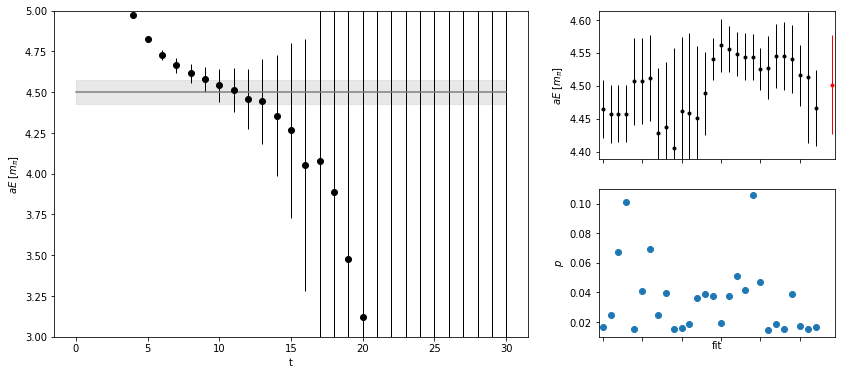

In [ ]:
en=2
fitTypes={}
fitTypes['single']={'fcn': single_exp, 'p0': p0_single()}
fitTypes['triple']={'fcn': triple_exp, 'p0': p0_triple()}
allFits, fitinfos, model_probs, energies = perform_many_fits(pivotedCorr, en, fitTypes, t0, NT-2, mpi)
allFits, fitinfos, model_probs, energies = remove_bad_fits(allFits, fitinfos, model_probs,energies, mpi, sdevCut=0.5, probCut=0.01
)
mAvg=model_avg(energies, model_probs)
print(mAvg/mpi)
model_average_summary_plot(pivotedCorr, en, energies, model_probs, mAvg, mpi, emYlim=[3,5])

allFitInfos[en]=fitinfos

/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.9/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction


5.29(13)


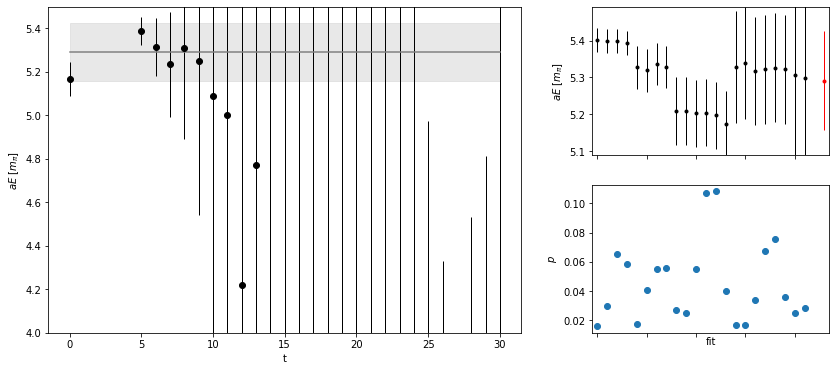

In [ ]:
en=3
fitTypes={}
fitTypes['single']={'fcn': single_exp, 'p0': p0_single()}
fitTypes['triple']={'fcn': triple_exp, 'p0': p0_triple()}
allFits, fitinfos, model_probs, energies = perform_many_fits(pivotedCorr, en, fitTypes, t0, NT-2, mpi)
allFits, fitinfos, model_probs, energies = remove_bad_fits(allFits, fitinfos, model_probs,energies, mpi, sdevCut=0.5, probCut=0.01
)
mAvg=model_avg(energies, model_probs)
print(mAvg/mpi)
model_average_summary_plot(pivotedCorr, en, energies, model_probs, mAvg, mpi, emYlim=[4,5.5])

allFitInfos[en]=fitinfos

In [19]:
### Resamples

In [20]:
t0=4
td=5

In [21]:
samples = get_pivoted_corr_samples(corrMatrix,t0,td)
cov = get_pivoted_corr(corrMatrix,t0,td)[1]

In [23]:
en=0
fitTypes={}
fitTypes['single']={'fcn': single_exp, 'p0': p0_single()}
fitTypes['triple']={'fcn': triple_exp, 'p0': p0_triple()}

en0samples=perform_good_fits_on_resamples(en, samples, cov, allFitInfos[en], fitTypes, t0, NT)

en=2
fitTypes={}
fitTypes['single']={'fcn': single_exp, 'p0': p0_single()}
fitTypes['triple']={'fcn': triple_exp, 'p0': p0_triple()}

en2samples=perform_good_fits_on_resamples(en, samples, cov, allFitInfos[en], fitTypes, t0, NT)

en=3
fitTypes={}
fitTypes['single']={'fcn': single_exp, 'p0': p0_single()}
fitTypes['triple']={'fcn': triple_exp, 'p0': p0_triple()}

en3samples=perform_good_fits_on_resamples(en, samples, cov, allFitInfos[en], fitTypes, t0, NT)

/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in exp
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: invalid value encountered in add
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/Code/LQCD/a1_analysis/fitting.py:246: RuntimeWarning: overflow encountered in multiply
  return p["A0"]*np.exp(-p["E0"]*t)+p["A1"]*np.exp(-p["E1"]*t)+p["A2"]*np.exp(-p["E2"]*t)
/home/chris/anaconda3/envs/LQCD/lib/python3.9/site-packages/scipy/optimize/_lsq/common.py:234: RuntimeWarning: overflow encountered in double_scalars
  ratio = actual_reduction / predicted_reduction


In [24]:
print(np.mean(en0samples)/mpi)
print(np.mean(en2samples)/mpi)
print(np.mean(en3samples)/mpi)


4.223818361393326
4.501480591963922
5.29090150471394


In [26]:
import h5py
import os

In [27]:
fileDir=os.path.join(os.path.expanduser("~"),"Downloads")
file=h5py.File(os.path.join(fileDir,"L2864_energies.hdf5"),"w")
dataSet=file.create_dataset("E0",np.array(en0samples).shape)
dataSet[:]=en0samples
dataSet=file.create_dataset("E1",np.array(en2samples).shape)
dataSet[:]=en2samples
dataSet=file.create_dataset("E2",np.array(en3samples).shape)
dataSet[:]=en3samples
file.close()